In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score

import lime
import lime.lime_tabular

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree

# Importing the dataset

** Dataset was collected from Kaggle**
- Link for the Dataset - https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset

In [2]:
data=pd.read_csv('spg.csv')

In [3]:
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [4]:
data.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [5]:
data=data.drop(['wind_speed_10_m_above_gnd','wind_direction_10_m_above_gnd','wind_speed_80_m_above_gnd','wind_direction_80_m_above_gnd','wind_speed_900_mb','wind_direction_900_mb','wind_gust_10_m_above_gnd'],axis=1)

In [6]:
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,19.199908,63.795208,182.13526,2640.20340


In [7]:
data.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'angle_of_incidence', 'zenith', 'azimuth', 'generated_power_kw'],
      dtype='object')

**Handling Missing Values**

In [8]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
data = data.rename(columns = {'generated_power_kw': 'power output'})

**Histogram of the Generated Power Output**

Text(0.5, 1.0, 'Generated Power Output Distribution')

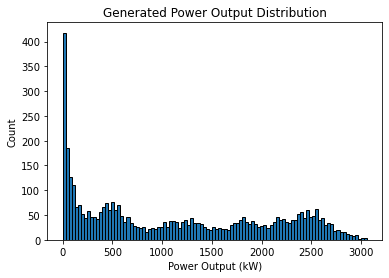

In [11]:
plt.hist(data['power output'].dropna(), bins=100, edgecolor='black')
plt.xlabel('Power Output (kW)')
plt.ylabel('Count')
plt.title('Generated Power Output Distribution')

In [12]:
correlations_data = data.corr()['power output'].sort_values()

In [13]:
print(correlations_data.head(15), '\n')

zenith                              -0.649991
angle_of_incidence                  -0.646537
relative_humidity_2_m_above_gnd     -0.336783
total_cloud_cover_sfc               -0.334338
low_cloud_cover_low_cld_lay         -0.288066
medium_cloud_cover_mid_cld_lay      -0.227834
high_cloud_cover_high_cld_lay       -0.147723
total_precipitation_sfc             -0.118442
azimuth                             -0.061184
snowfall_amount_sfc                 -0.049508
mean_sea_level_pressure_MSL          0.150551
temperature_2_m_above_gnd            0.217280
shortwave_radiation_backwards_sfc    0.556148
power output                         1.000000
Name: power output, dtype: float64 



In [14]:
features = pd.concat([data], axis = 1)

In [15]:
plot_data = features[['power output', 'zenith','angle_of_incidence','temperature_2_m_above_gnd']]

In [16]:
plot_data=plot_data.replace({np.inf:np.nan,-np.inf:np.nan})

In [17]:
plot_data = plot_data.rename(columns = {'angle_of_incidence': 'angle of incidence','temperature_2_m_above_gnd': 'temperature above ground',})

In [18]:
plot_data = plot_data.dropna()

In [19]:
# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

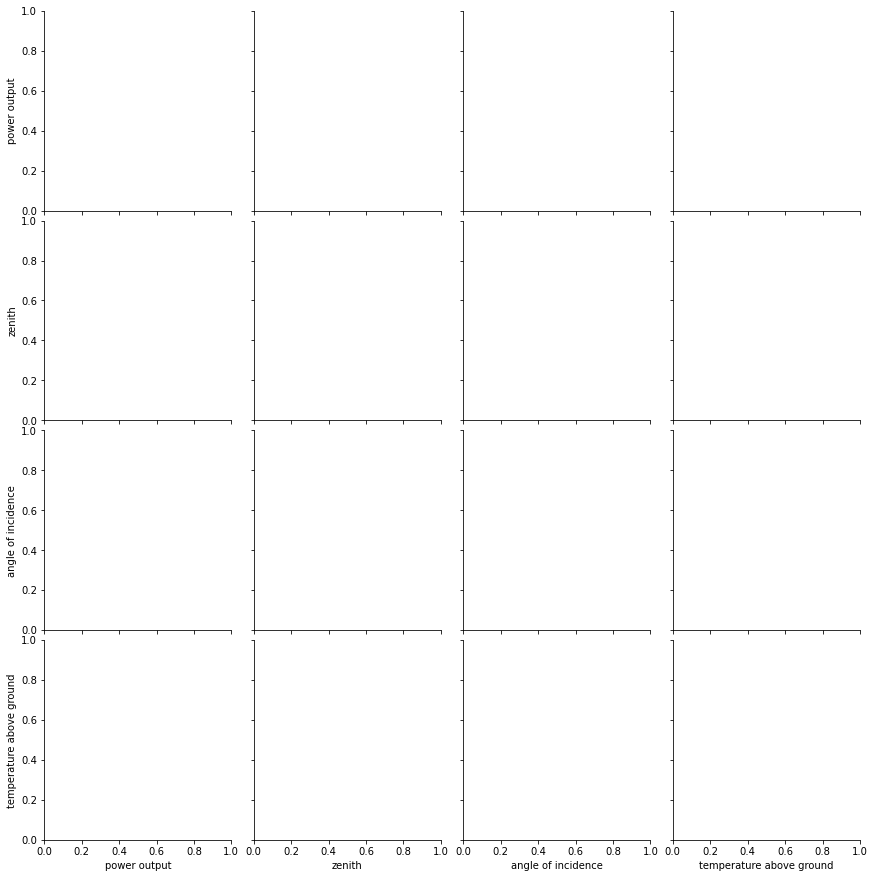

In [20]:
grid = sns.PairGrid(data = plot_data, height = 3)

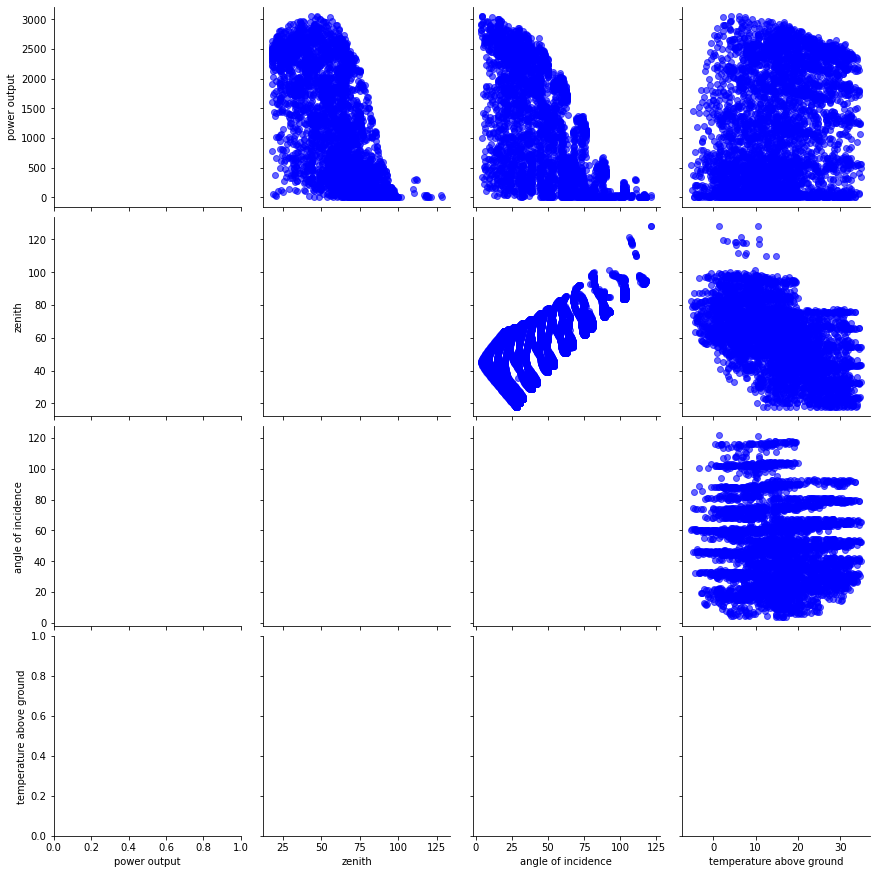

In [21]:
# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'blue', alpha = 0.6)

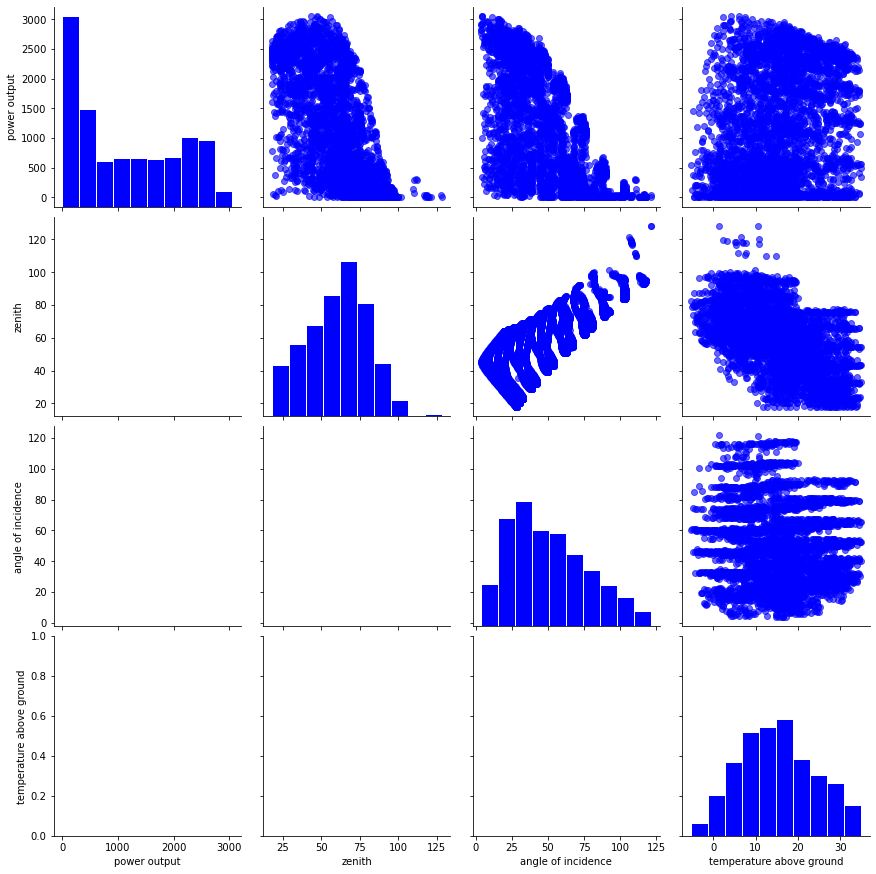

In [22]:
# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'blue', edgecolor = 'white')

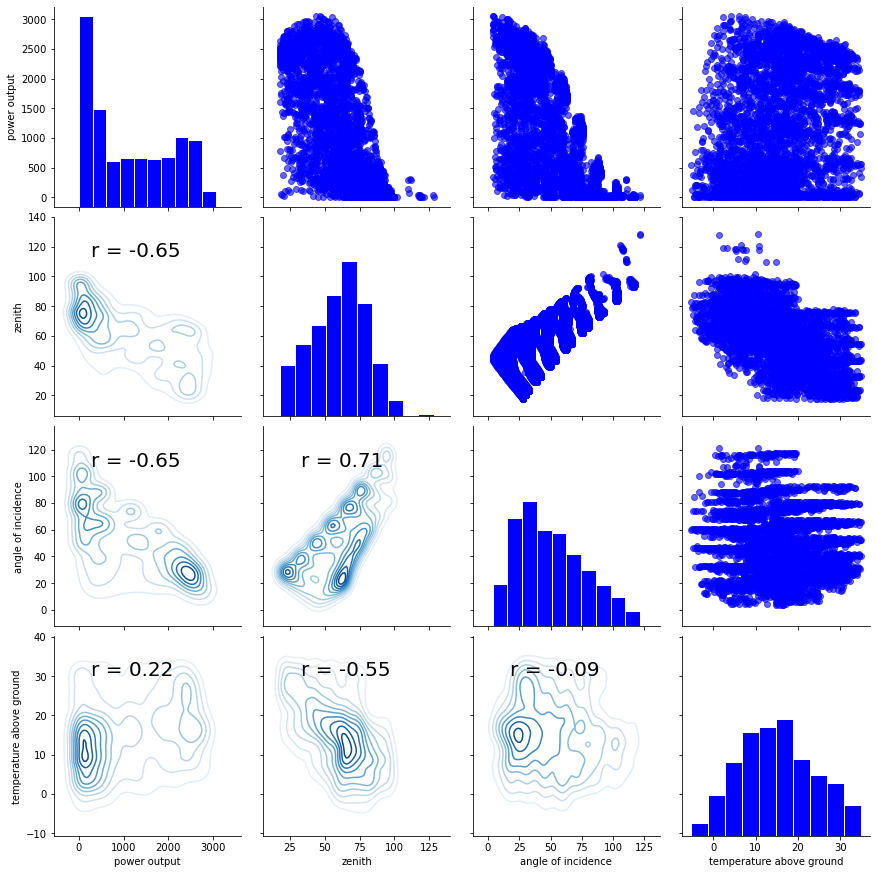

In [23]:
# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Blues)

In [24]:
# Copy the original data
features = data.copy()

In [25]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

In [26]:
numeric_subset

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,angle_of_incidence,zenith,azimuth,power output
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,36.361161,70.496313,211.30027,126.953060


In [27]:
# Create columns with log of numeric columns
for col in numeric_subset.columns:
    if col == 'power output':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col],where=numeric_subset[col]>0)
features.shape

(4213, 14)

In [28]:
numeric_subset.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'angle_of_incidence', 'zenith', 'azimuth', 'power output',
       'log_temperature_2_m_above_gnd', 'log_relative_humidity_2_m_above_gnd',
       'log_mean_sea_level_pressure_MSL', 'log_total_precipitation_sfc',
       'log_snowfall_amount_sfc', 'log_total_cloud_cover_sfc',
       'log_high_cloud_cover_high_cld_lay',
       'log_medium_cloud_cover_mid_cld_lay', 'log_low_cloud_cover_low_cld_lay',
       'log_shortwave_radiation_backwards_sfc', 'log_angle_of_incidence',
       'log_zenith', 'log_azimuth'],
      dtype='object')

In [29]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
    Inputs:
        threshold: any features with correlations greater than this value are removed
    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations between Energy Star Score
    y = x['power output']
    x = x.drop(columns=['power output'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j + 1), (i + 1):(i + 2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    x = x.drop(columns=['total_cloud_cover_sfc'])

    # Add the score back in to the data
    x['power output'] = y
    return x

In [30]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);
# Remove any columns with all na values
features = features.dropna(axis=1, how = 'all')
print(features.shape)

medium_cloud_cover_mid_cld_lay | total_cloud_cover_sfc | 0.71
low_cloud_cover_low_cld_lay | total_cloud_cover_sfc | 0.75
shortwave_radiation_backwards_sfc | temperature_2_m_above_gnd | 0.67
shortwave_radiation_backwards_sfc | relative_humidity_2_m_above_gnd | 0.72
zenith | shortwave_radiation_backwards_sfc | 0.8
(4213, 9)


In [31]:
# Separate out the features and targets
features = data.drop(columns='power output')
targets = pd.DataFrame(data['power output'])

In [32]:
# Replace the inf and -inf with nan
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

**Split into 80% training and 20% testing set**

In [33]:
X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=.20,random_state=42)

In [34]:
X_train.shape

(3370, 13)

In [35]:
X_test.shape

(843, 13)

In [36]:
y_train.shape

(3370, 1)

In [37]:
y_test.shape

(843, 1)

In [38]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [39]:
baseline_guess = np.median(y_train)

In [40]:
print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 987.06
Baseline Performance on the test set: MAE = 853.9721


C:\Users\ASHWINI\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [41]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

In [42]:
# Train on the training features
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [43]:
# Transform both training data and testing data
X = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [44]:
'Missing values in training features: ', np.sum(np.isnan(X_train))

('Missing values in training features: ',
 temperature_2_m_above_gnd            0
 relative_humidity_2_m_above_gnd      0
 mean_sea_level_pressure_MSL          0
 total_precipitation_sfc              0
 snowfall_amount_sfc                  0
 total_cloud_cover_sfc                0
 high_cloud_cover_high_cld_lay        0
 medium_cloud_cover_mid_cld_lay       0
 low_cloud_cover_low_cld_lay          0
 shortwave_radiation_backwards_sfc    0
 angle_of_incidence                   0
 zenith                               0
 azimuth                              0
 dtype: int64)

In [45]:
'Missing values in testing features:  ', np.sum(np.isnan(X_test))

('Missing values in testing features:  ', 0)

In [46]:
# Make sure all values are finite
np.where(~np.isfinite(X_train))

(array([], dtype=int64), array([], dtype=int64))

In [47]:
np.where(~np.isfinite(X_test))

(array([], dtype=int64), array([], dtype=int64))

In [48]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

In [49]:
# Fit on the training data
scaler.fit(X_train)

MinMaxScaler()

In [50]:
# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\ASHWINI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [51]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [52]:
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions and evaluate
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)

    # Return the performance metric
    return model_mae

    models = []

In [53]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

In [54]:
print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 388.9408


In [55]:
svm = SVR(C = 1.0, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

In [56]:
print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 804.4097


In [57]:
random_forest = RandomForestRegressor(random_state=42)
random_forest_mae = fit_and_evaluate(random_forest)

In [58]:
print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 257.6213


In [59]:
gradient_boosted = GradientBoostingRegressor(random_state=42)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

In [60]:
print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 288.5634


In [61]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

In [62]:
print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 296.0252


In [63]:
# print a fivethirtyeight graph
plt.style.use('fivethirtyeight')

In [64]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae,
                                         gradient_boosted_mae, knn_mae]})

<AxesSubplot:ylabel='model'>

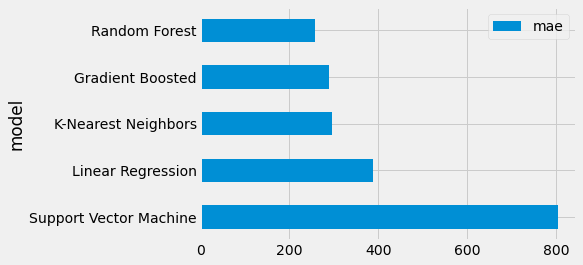

In [65]:
# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

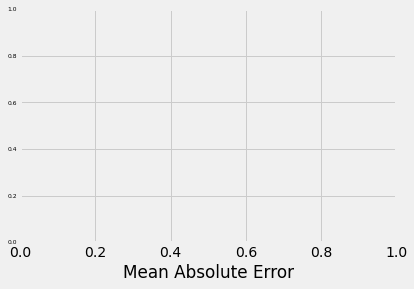

In [66]:
# Plot formatting
plt.xlabel('Mean Absolute Error')
plt.ylabel('')
plt.yticks(fontsize=6)

In [67]:
# hyperparameters
# Number of trees used in the boosting process
n_estimators = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

In [68]:
# Maximum depth of each tree
max_depth = [2, 4, 5, 8, 12]

In [69]:
# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

In [70]:
# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 8, 10]

In [71]:
# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

In [72]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [73]:
# Create the model to use for hyperparameter tuning
model = RandomForestRegressor(random_state = 42)

In [74]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25,
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1,
                               return_train_score = True,
                               random_state=42)

In [75]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 5, 8, 12],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [76]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

In [77]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  random_results.head(10)

In [78]:
# Default model
default_model = RandomForestRegressor(random_state = 42)

In [79]:
# Final model
final_model = RandomForestRegressor(
                              max_depth = 14,
                              min_samples_leaf = 1,
                              min_samples_split = 8,
                              max_features = 'log2',
                              random_state = 42, n_estimators = 900 )

In [80]:
import timeit
default_model.fit(X_train, y_train)
print("The time taken is ",timeit.timeit(stmt='a=10;b=10;sum=a+b'))
final_model.fit(X_train, y_train)
print("The time taken is ",timeit.timeit(stmt='a=10;b=10;sum=a+b'))

The time taken is  0.04256240000000844
The time taken is  0.040512599999999566


In [81]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
# Make predictions on the test set using default and final model
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

In [83]:
print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 257.6213.
Final model performance on the test set:   MAE = 269.8983.


In [84]:
# Evaluate using a train and a test set
model = RandomForestRegressor()
model.fit(X_train, y_train)
result = final_model.score(X_test, y_test)
print("Final Accuracy: %.2f%%" % (result*100.0))

Final Accuracy: 81.64%


In [85]:
# Evaluate using a train and a test set
model = RandomForestRegressor()
model.fit(X_train, y_train)
result = default_model.score(X_test, y_test)
print("Default Accuracy: %.2f%%" % (result*100.0))

Default Accuracy: 81.07%


In [86]:
importances = model.feature_importances_
indices = np.argsort(importances)

In [87]:
# Keep only the most important features
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

In [88]:
print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (3370, 13)
Most important testing  features shape:  (843, 13)


In [89]:
rf = RandomForestRegressor()

In [90]:
# Fit on full set of features
rf.fit(X_train, y_train)
rf_full_pred = rf.predict(X_test)

In [91]:
# Fit on reduced set of features
rf.fit(X_reduced, y_train)
rf_reduced_pred = rf.predict(X_test_reduced)

In [92]:
# Display results
print('Random Forest Regression Full Results: MAE =    %0.4f.' % mae(y_test, rf_full_pred))
print('Random Forest Regression Reduced Results: MAE = %0.4f.' % mae(y_test, rf_reduced_pred))

Random Forest Regression Full Results: MAE =    256.3896.
Random Forest Regression Reduced Results: MAE = 951.3897.


In [93]:
# Find the residuals
residuals = abs(final_pred - y_test)

In [94]:
# Exact the worst and best prediction
wrong = X_test[np.argmax(residuals), :]
right = X_test[np.argmin(residuals), :]

In [95]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train,
                                                   mode = 'regression',
                                                   training_labels = y_train,
                                                   feature_names = list(features))

In [96]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

Prediction: 2229.2541
Actual Value: 385.0756


In [97]:
# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong,
                                       predict_fn = model.predict)

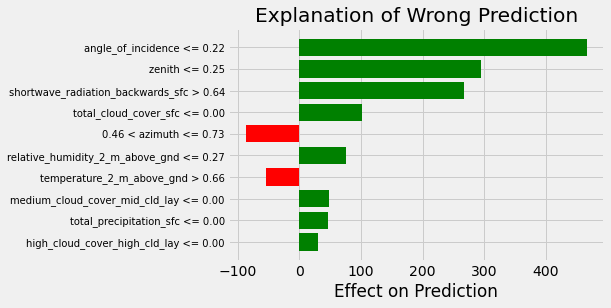

In [98]:
# Plot the prediction explanation
wrong_exp.as_pyplot_figure();
plt.yticks(fontsize=10)
plt.title('Explanation of Wrong Prediction');
plt.xlabel('Effect on Prediction');

In [99]:
# Display the predicted and true value for the right instance
print('Prediction: %0.4f' % model.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

Prediction: 2428.7754
Actual Value: 2392.4464


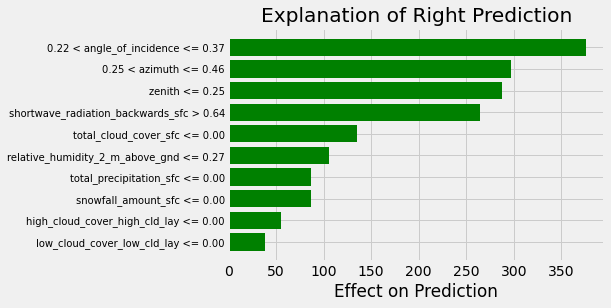

In [100]:
# Explanation for right prediction
right_exp = explainer.explain_instance(right, model.predict)
right_exp.as_pyplot_figure();
plt.yticks(fontsize=10)
plt.title('Explanation of Right Prediction');
plt.xlabel('Effect on Prediction');

In [101]:
X = data
y = targets

In [102]:
regr = DecisionTreeRegressor(max_depth=3, random_state=42)
model = regr.fit(X, y)

In [103]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_13 <= 1261.10
|   |--- feature_13 <= 519.51
|   |   |--- feature_13 <= 226.76
|   |   |   |--- value: [66.62]
|   |   |--- feature_13 >  226.76
|   |   |   |--- value: [386.67]
|   |--- feature_13 >  519.51
|   |   |--- feature_13 <= 869.88
|   |   |   |--- value: [653.63]
|   |   |--- feature_13 >  869.88
|   |   |   |--- value: [1086.00]
|--- feature_13 >  1261.10
|   |--- feature_13 <= 2060.61
|   |   |--- feature_13 <= 1641.04
|   |   |   |--- value: [1432.73]
|   |   |--- feature_13 >  1641.04
|   |   |   |--- value: [1850.36]
|   |--- feature_13 >  2060.61
|   |   |--- feature_13 <= 2459.28
|   |   |   |--- value: [2279.00]
|   |   |--- feature_13 >  2459.28
|   |   |   |--- value: [2638.89]



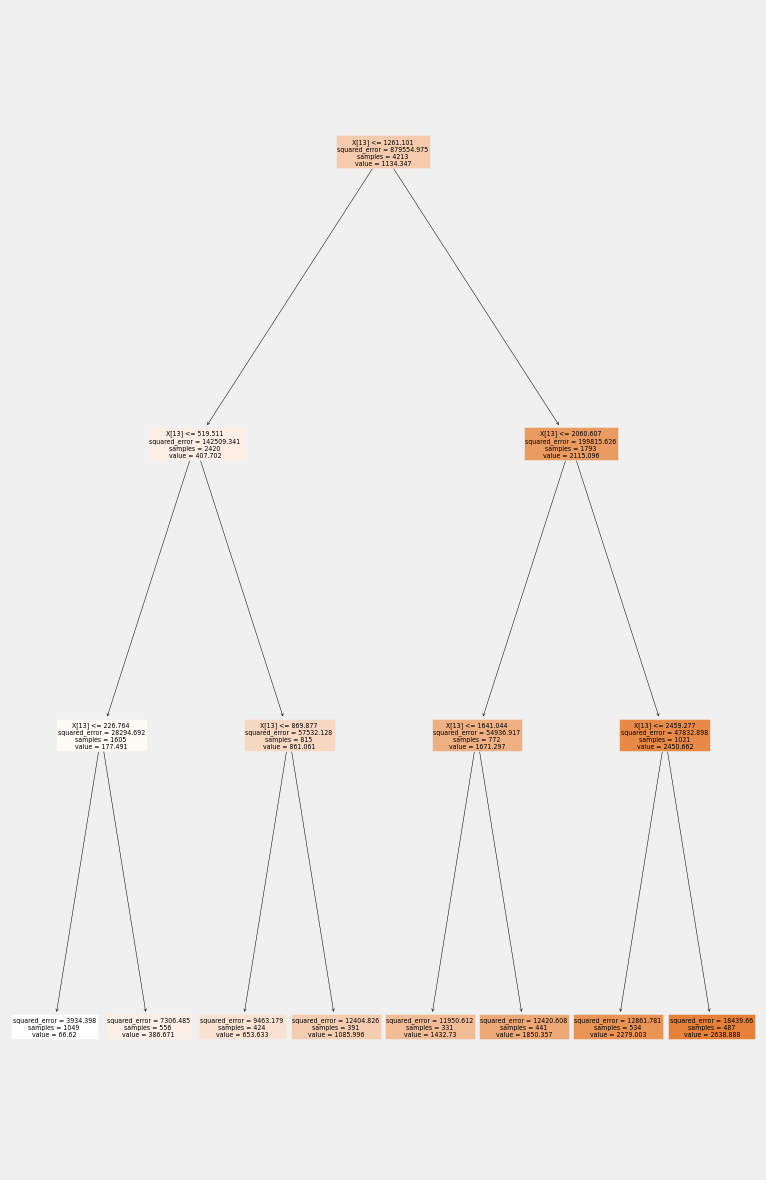

In [104]:
fig = plt.figure(figsize=(12,20))
_ = tree.plot_tree(regr, filled=True)
plt.show()

# NATURE INSPIRIED ALGORITHM

In [105]:
from sklearn_nature_inspired_algorithms.model_selection.nature_inspired_search_cv import NatureInspiredSearchCV
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot
from sklearn.metrics import classification_report

**BAT ALGORITHM**

In [106]:
import time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestRegressor
time1 = time.time()

param_grid={'bootstrap': [True],
 'max_depth': [70],
 'max_features': ['auto'],
 'min_samples_leaf':[2], 
 'min_samples_split': [5],
 'n_estimators': [800]
 }

clf_1 = RandomForestRegressor(random_state = 42)
nia_search = NatureInspiredSearchCV(
    clf_1,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', 
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42)

nia_search.fit(X_train, y_train)
print("Bat model")
print("Random Forest")

Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Run 1/5, Iteration 1/100 | Stagnation 0/20 | There were 1 candidates trained until now
Run 1/5, Iteration 2/100 | Stagnation 1/20 | There were 1 candidates trained until now
Run 1/5, Iteration 3/100 | Stagnation 2/20 | There were 1 candidates trained until now
Run 1/5, Iteration 4/100 | Stagnation 3/20 | There were 1 candidates trained until now
Run 1/5, Iteration 5/100 | Stagnation 4/20 | There were 1 candidates trained until now
Run 1/5, Iteration 6/100 | Stagnation 5/20 | There were 1 candidates trained until now
Run 1/5, Iteration 7/100 | Stagnation 6/20 | There were 1 candidates trained until now
Run 1/5, Iteration 8/100 | Stagnation 7/20 | There were 1 candidates trained until now
Run 1/5, Iteration 9/100 | Stagnation 8/20 | There were 1 candidates trained until now
Run 1/5, Iteration 10/100 | Stagnation 9/20 | There were 1 candidates trained until 

Bat model
Random Forest


<AxesSubplot:xlabel='generation', ylabel='max score'>

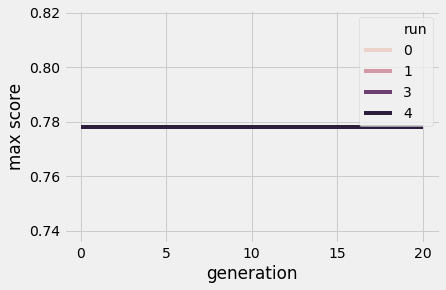

In [107]:
score_by_generation_lineplot(nia_search)

In [108]:
from sklearn.metrics import mean_squared_error
import math
print("Accuracy Report of Random Forest with Bat Algorithm")
print('\n')
clf = RandomForestRegressor(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
result = clf.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy Report of Random Forest with Bat Algorithm


Accuracy: 81.16%


**HYBRID BAT ALGORITHM**

In [109]:
time1 = time.time()
param_grid={'bootstrap': [True],  
            'max_depth' : [None], 
            'max_features' : ['auto'],
            'min_samples_leaf' : [2], #intial 1
            'min_samples_split' : [5],
            'n_estimators' : [200]
                      }
rfc = RandomForestRegressor(random_state = 42)
nia_search = NatureInspiredSearchCV(
    rfc,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybrid bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
)


nia_search.fit(X_train, y_train)
print("Hybrid Bat model")

print("Random Forest")

Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Run 1/5, Iteration 1/100 | Stagnation 0/20 | There were 1 candidates trained until now
Run 1/5, Iteration 2/100 | Stagnation 1/20 | There were 1 candidates trained until now
Run 1/5, Iteration 3/100 | Stagnation 2/20 | There were 1 candidates trained until now
Run 1/5, Iteration 4/100 | Stagnation 3/20 | There were 1 candidates trained until now
Run 1/5, Iteration 5/100 | Stagnation 4/20 | There were 1 candidates trained until now
Run 1/5, Iteration 6/100 | Stagnation 5/20 | There were 1 candidates trained until now
Run 1/5, Iteration 7/100 | Stagnation 6/20 | There were 1 candidates trained until now
Run 1/5, Iteration 8/100 | Stagnation 7/20 | There were 1 candidates trained until now
Run 1/5, Iteration 9/100 | Stagnation 8/20 | There were 1 candidates trained until now
Run 1/5, Iteration 10/100 | Stagnation 9/20 | There were 1 candidates trained until 

Hybrid Bat model
Random Forest


<AxesSubplot:xlabel='generation', ylabel='max score'>

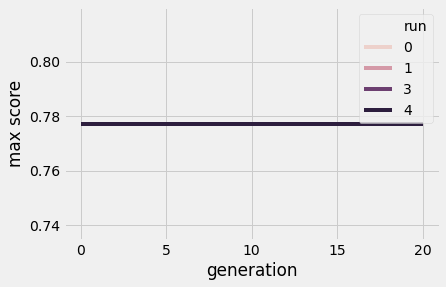

In [110]:
score_by_generation_lineplot(nia_search)

In [111]:
print("Accuracy Report of Random Forest Hybrid bat algorithm")
print('\n')
clf = RandomForestRegressor(**nia_search.best_params_, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
result = clf.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy Report of Random Forest Hybrid bat algorithm


Accuracy: 81.31%


**GREY WOLF OPTIMIZER**

In [112]:
time1 = time.time()
param_grid_rt={'n_estimators': [400,100],
 'max_features': ['sqrt'],
 'max_depth': [40,None],
 'min_samples_split': [2,5], #intial 2
 'min_samples_leaf': [2,5],
 'bootstrap': [True]}

clf_21 = RandomForestRegressor(random_state = 42)
nia_search21 = NatureInspiredSearchCV(
    clf_21,
    param_grid_rt,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search21.fit(X_train, y_train)
print("Greywolf model")

print("Random Forest")

Fitting 3 folds for some of the 16 candidates, which might total in 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidate

Run 4/5, Iteration 21/100 | Stagnation 20/20 | There were 16 candidates trained until now
Run 4/5 finished
Run 5/5, Iteration 1/100 | Stagnation 0/20 | There were 16 candidates trained until now
Run 5/5, Iteration 2/100 | Stagnation 1/20 | There were 16 candidates trained until now
Run 5/5, Iteration 3/100 | Stagnation 2/20 | There were 16 candidates trained until now
Run 5/5, Iteration 4/100 | Stagnation 3/20 | There were 16 candidates trained until now
Run 5/5, Iteration 5/100 | Stagnation 4/20 | There were 16 candidates trained until now
Run 5/5, Iteration 6/100 | Stagnation 5/20 | There were 16 candidates trained until now
Run 5/5, Iteration 7/100 | Stagnation 6/20 | There were 16 candidates trained until now
Run 5/5, Iteration 8/100 | Stagnation 7/20 | There were 16 candidates trained until now
Run 5/5, Iteration 9/100 | Stagnation 8/20 | There were 16 candidates trained until now
Run 5/5, Iteration 10/100 | Stagnation 9/20 | There were 16 candidates trained until now
Run 5/5, Ite

In [113]:
nia_search21.best_params_

{'n_estimators': 400,
 'max_features': 'sqrt',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'bootstrap': True}

<AxesSubplot:xlabel='generation', ylabel='max score'>

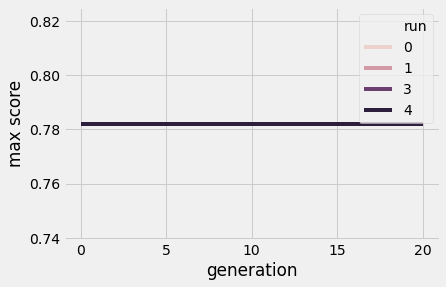

In [114]:
score_by_generation_lineplot(nia_search21)

In [115]:
print("Accuracy Report of Random Forest with Greywolf algorithm")
print('\n')
clf = RandomForestRegressor(**nia_search21.best_params_, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
result = clf.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy Report of Random Forest with Greywolf algorithm


Accuracy: 81.55%


**FIREFLY ALGORITHM**

In [116]:
time1 = time.time()
param_grid_rt={'n_estimators': [800],
 'max_features': ['sqrt'],
 'max_depth': [60],
 'min_samples_split': [2,10,5],
 'min_samples_leaf': [1,5,10],
 'bootstrap': [True]}

clf_31 = RandomForestRegressor(random_state = 42)
nia_search31 = NatureInspiredSearchCV(
    clf_31,
    param_grid_rt,
    cv=3,
    verbose=2,
    algorithm='fa', #  Firefly algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search31.fit(X_train, y_train)
print("Firefly model")

print("Random Forest")

Fitting 3 folds for some of the 9 candidates, which might total in 27 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Run 1/5, Iteration 1/100 | Stagnation 0/20 | There were 9 candidates trained until now
Run 1/5, Iteration 2/100 | Stagnation 1/20 | There were 9 candidates trained until now
Run 1/5, Iteration 3/100 | Stagnation 2/20 | There were 9 candidates trained until now
Run 1/5, Iteration 4/100 | Stagnation 3/20 | There were 9 candidates trained until now
Run 1/5, Iteration 5/100 | Stagnation 4/20 | T

Run 5/5, Iteration 5/100 | Stagnation 4/20 | There were 9 candidates trained until now
Run 5/5, Iteration 6/100 | Stagnation 5/20 | There were 9 candidates trained until now
Run 5/5, Iteration 7/100 | Stagnation 6/20 | There were 9 candidates trained until now
Run 5/5, Iteration 8/100 | Stagnation 7/20 | There were 9 candidates trained until now
Run 5/5, Iteration 9/100 | Stagnation 8/20 | There were 9 candidates trained until now
Run 5/5, Iteration 10/100 | Stagnation 9/20 | There were 9 candidates trained until now
Run 5/5, Iteration 11/100 | Stagnation 10/20 | There were 9 candidates trained until now
Run 5/5, Iteration 12/100 | Stagnation 11/20 | There were 9 candidates trained until now
Run 5/5, Iteration 13/100 | Stagnation 12/20 | There were 9 candidates trained until now
Run 5/5, Iteration 14/100 | Stagnation 13/20 | There were 9 candidates trained until now
Run 5/5, Iteration 15/100 | Stagnation 14/20 | There were 9 candidates trained until now
Run 5/5, Iteration 16/100 | Stag

In [117]:
nia_search31.best_params_

{'n_estimators': 800,
 'max_features': 'sqrt',
 'max_depth': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'bootstrap': True}

<AxesSubplot:xlabel='generation', ylabel='max score'>

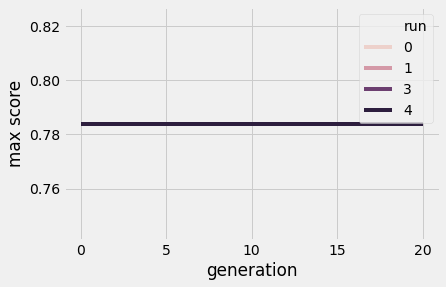

In [118]:
score_by_generation_lineplot(nia_search31)

In [119]:
print("Accuracy Report of Random Forest Firefly algorithm")
print('\n')
clf = RandomForestRegressor(**nia_search31.best_params_, random_state=42)
clf=clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
result = clf.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy Report of Random Forest Firefly algorithm


Accuracy: 81.76%


# Inclination Angle according to the Climate 

In [120]:
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,angle_of_incidence,zenith,azimuth,power output
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,19.199908,63.795208,182.13526,2640.20340


In [121]:
# Separate out the features and targets
angle_features = data.drop(['power output','angle_of_incidence'],axis=1)
angle_targets = pd.DataFrame(data['angle_of_incidence'])

In [122]:
X_train1,X_test1,y_train1,y_test1=train_test_split(angle_features,angle_targets,test_size=.20,random_state=42)

In [123]:
X_train1.shape

(3370, 12)

In [124]:
imputer1 = SimpleImputer(strategy='median')

In [125]:
imputer1.fit(X_train1)

SimpleImputer(strategy='median')

In [126]:
# Transform both training data and testing data
X1 = imputer1.transform(X_train1)
X_test1 = imputer1.transform(X_test1)

In [127]:
# Create the scaler object with a range of 0-1
scaler1 = MinMaxScaler(feature_range=(0, 1))

In [128]:
# Fit on the training data
scaler1.fit(X_train1)

MinMaxScaler()

In [129]:
# Transform the training and testing data
X_train1 = scaler1.transform(X_train1)
X_test1 = scaler1.transform(X_test1)

C:\Users\ASHWINI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [130]:
X_train1.shape

(3370, 12)

In [131]:
random_forest1 = RandomForestRegressor(random_state=42)
random_forest_mae1 = fit_and_evaluate(random_forest)

In [132]:
random_forest1=random_forest1.fit(X_train1, y_train1)

C:\Users\ASHWINI\AppData\Local\Temp\ipykernel_16720\2158073995.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest1=random_forest1.fit(X_train1, y_train1)


In [133]:
random_forest1

RandomForestRegressor(random_state=42)

# Testing the Model

In [134]:
f = np.array([[20,42,1015.5,0,0,2,0,2,0,269.67,61.833799,82.98212]])

In [135]:
inclination_angle=random_forest1.predict(scaler1.transform(f))

C:\Users\ASHWINI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [136]:
optimal_feature=np.array([[4.71,72,1020.7,0,0,100,1,100,100,320.4,inclination_angle[0],56.403771,196.79298]])

In [137]:
optimal_power=clf.predict(scaler.transform(optimal_feature))

C:\Users\ASHWINI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [138]:
print("The required solar panel angle of inclination : %0.4f" %inclination_angle[0])
print("The optimal power generated at the given angle : %0.4f kW" %optimal_power[0])

The required solar panel angle of inclination : 75.1465
The optimal power generated at the given angle : 860.2770 kW
